In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Init

In [5]:
# path = 'C:/Users/robin.opdam/Google Drive/Thesis (Msc)/Thesis_shared_files/'
path = '/Users/Robin/Google Drive/Thesis (Msc)/Thesis_shared_files/'

---
# Compare Results

In [100]:
file_names = ['ml_1m', 'am_like_ml', 'am_20k_users']
titles = ['MovieLens 1m', 'am_like_ml', 'am_20k_users']

## All metrics comparison

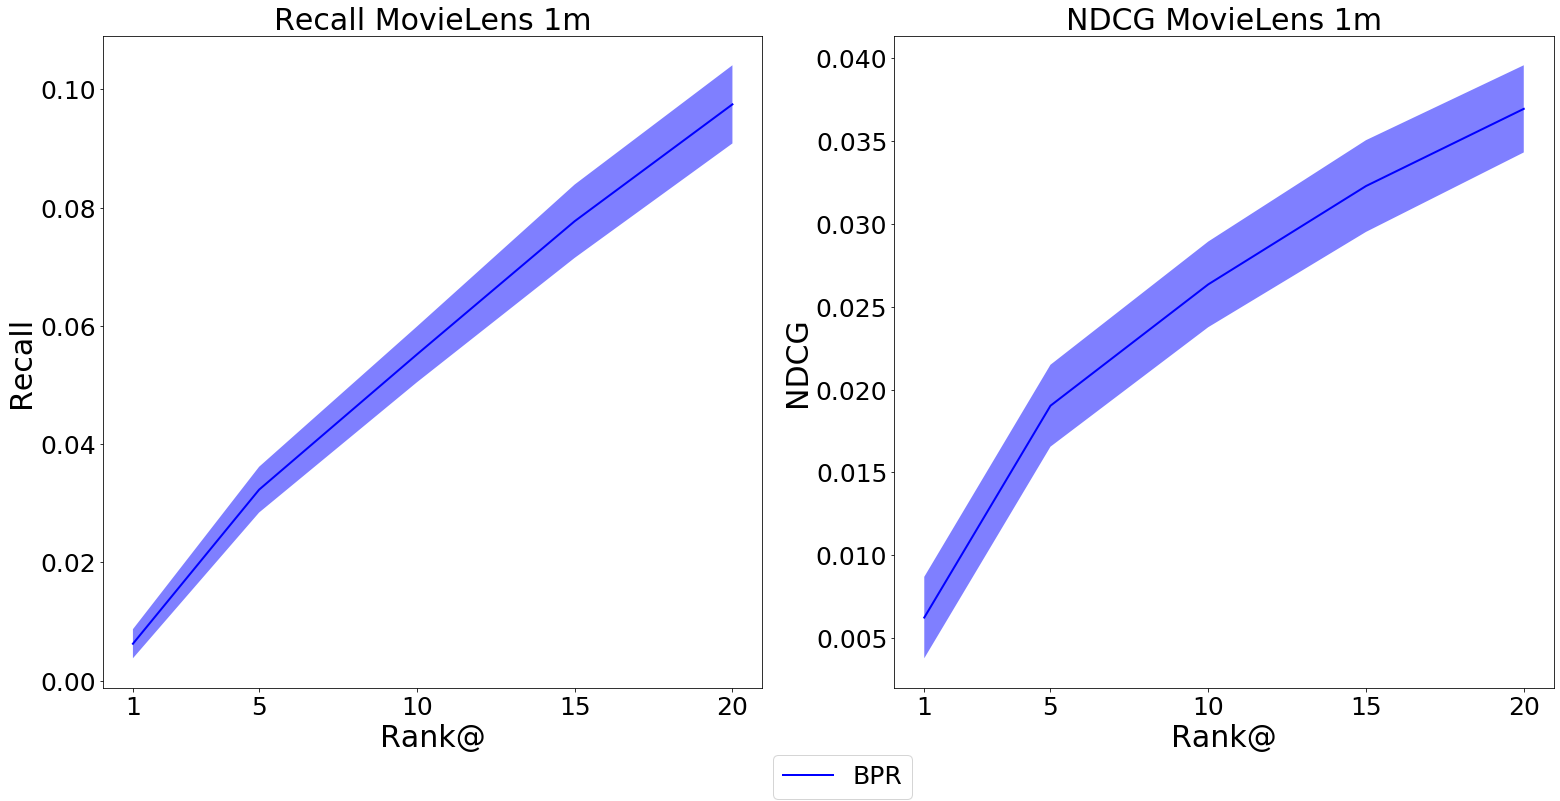

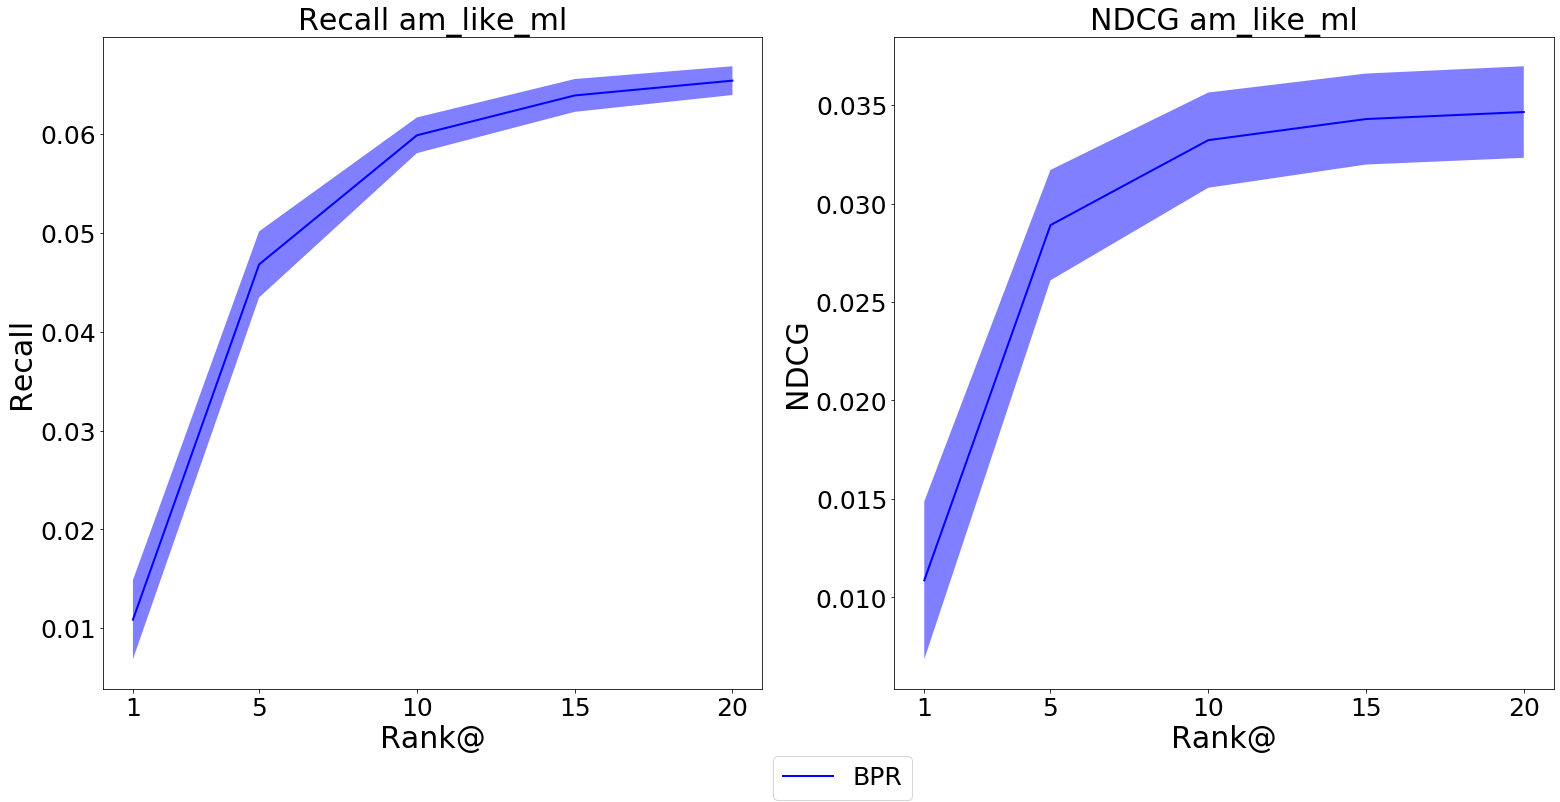

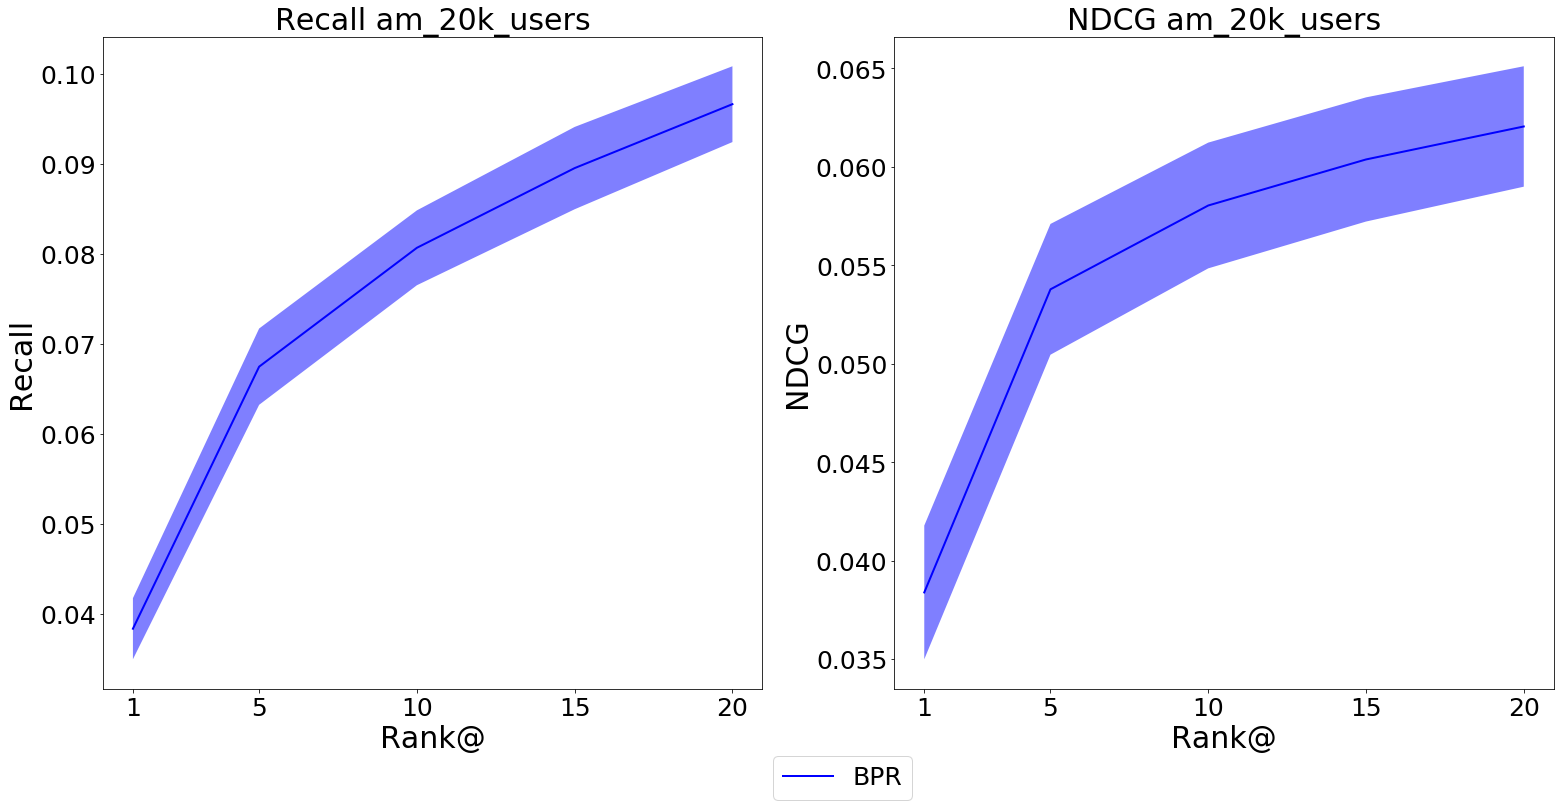

In [103]:
from Evaluation import get_final_results
from visualize_results import plot_final_metrics

final_results = {'metrics':{}, 'stats':{'bpr':[], 'cfrnn':[], 'neumf':[]}, 'time':[]}
for file_name, title in zip(file_names, titles):
    bpr_ml_1m = pd.read_pickle(path + 'Logs/final/' + file_name + '_bpr_log')
    # cfrnn_ml_1m = pd.read_pickle(path + 'Logs/final/' + file_name + '_cfrnn_log')
    # neumf_ml_1m = pd.read_pickle(path + 'Logs/final/' + file_name + '_neumf_log')
    results = [bpr_ml_1m]#, cfrnn_ml_1m, neumf_ml1]
    final_results['metrics'][file_name] = []
    
    for res, name in zip(results, final_results['stats'].keys()):
        final_metrics, train_stats, train_time = get_final_results(res)
        final_results['metrics'][file_name].append(final_metrics)
        final_results['stats'][name].append(train_stats)
        final_results['time'].append(train_time)
    
    colors = ['blue']
    labels = ['BPR']
    metrics_to_show = ['recall', 'ndcg']
    plot_final_metrics(final_results['metrics'][file_name], colors, labels, metrics_to_show, title)

## BPR Train Stats

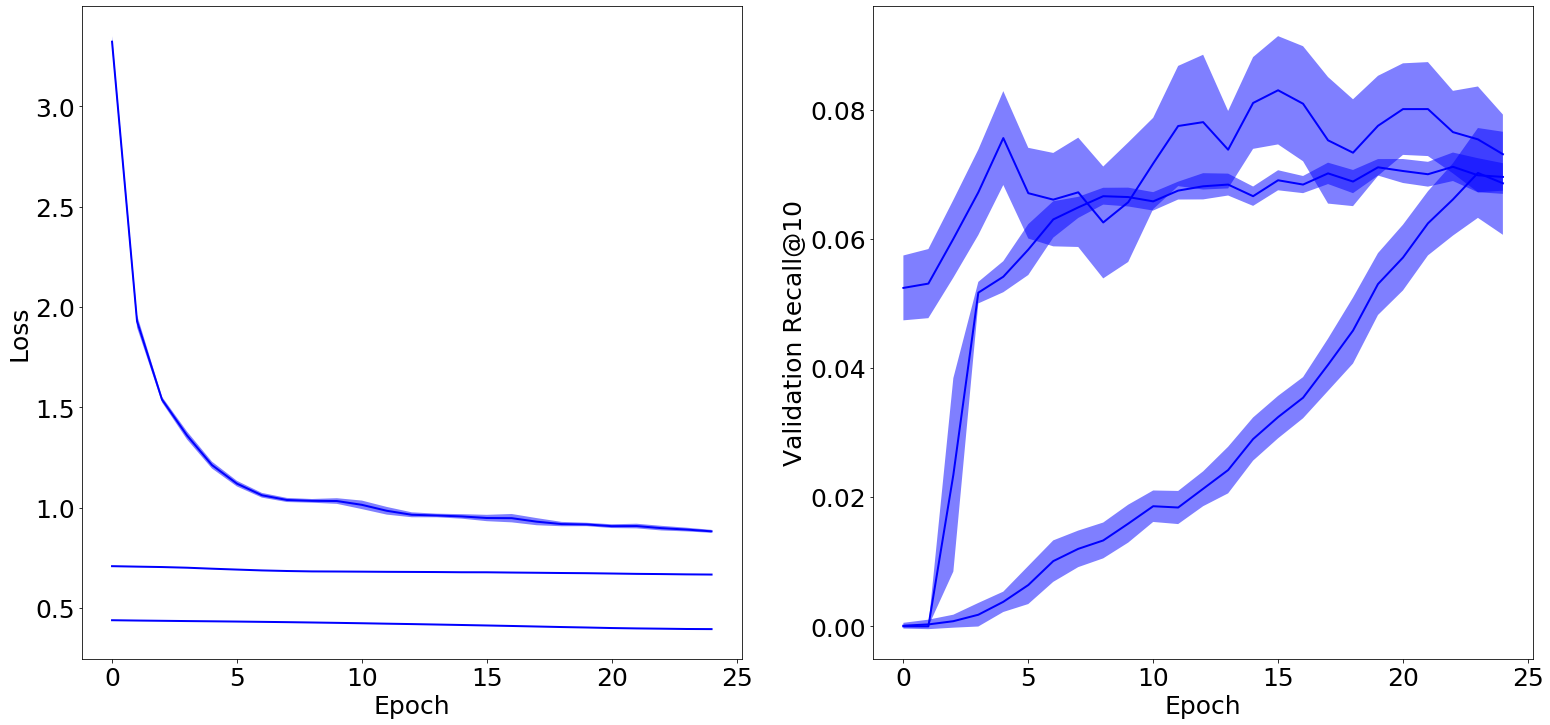

In [112]:
from visualize_results import plot_train_stats
proplot_train_stats(final_results['stats']['bpr'], color='blue', size=(26,12))

## CFRNN Train Stats

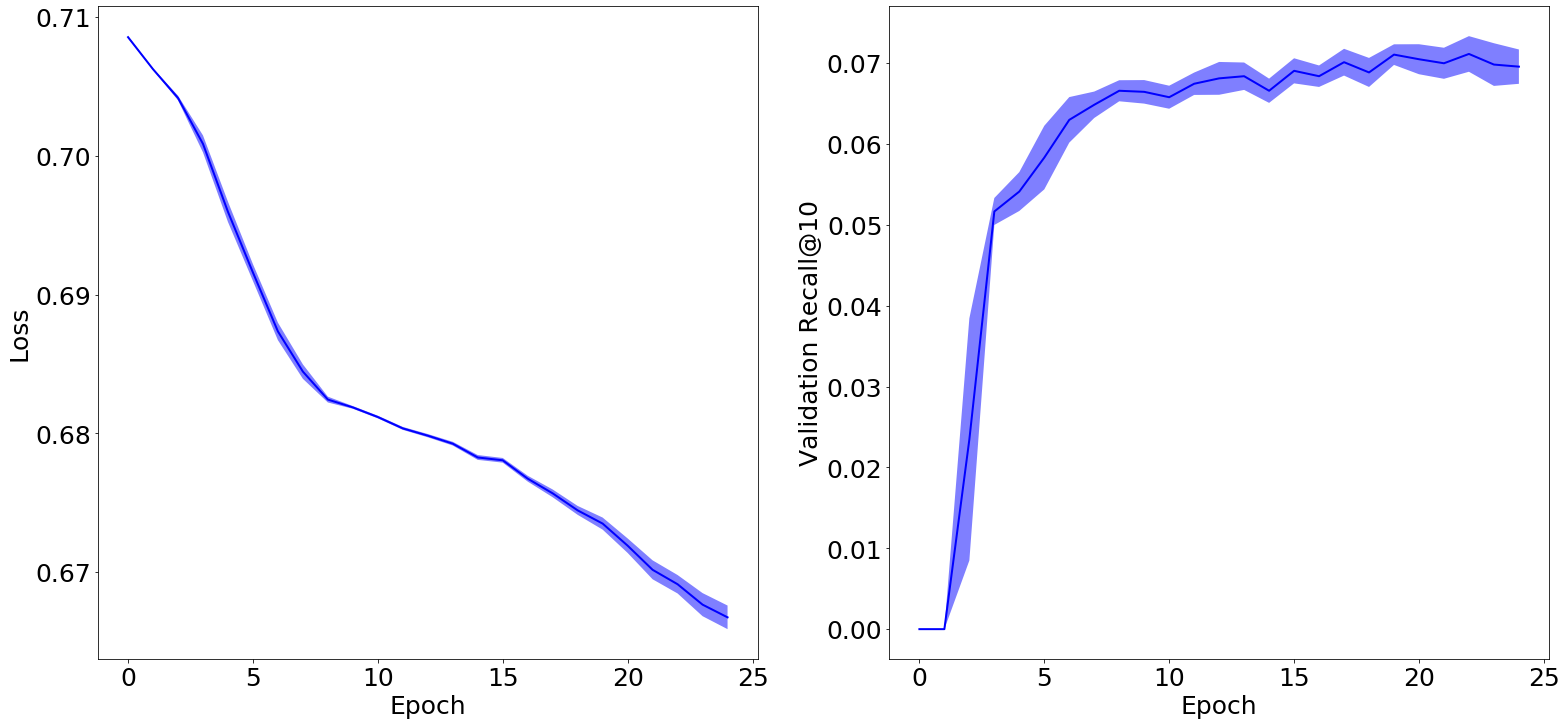

In [90]:
plot_train_stats(final_results['stats'][0], color='blue', size=(26,12))

## NeuMF Train Stats

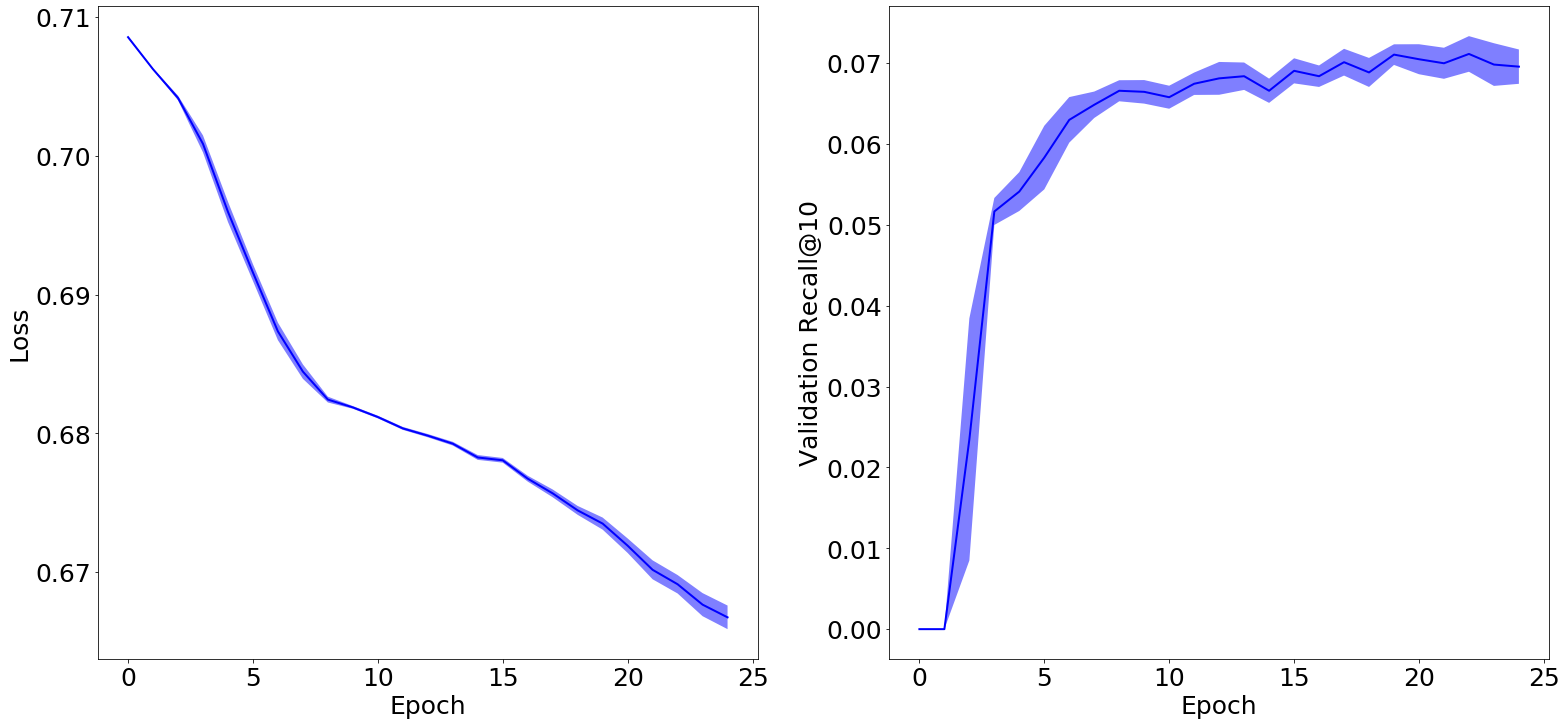

In [90]:
plot_train_stats(final_results['stats'][0], color='blue', size=(26,12))